In [13]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
#For showing chart
%matplotlib inline

In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
df.rename(columns={'Annual Income (k$)':'income','Spending Score (1-100)':'score','Gender':'gender'},inplace=True)

In [7]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

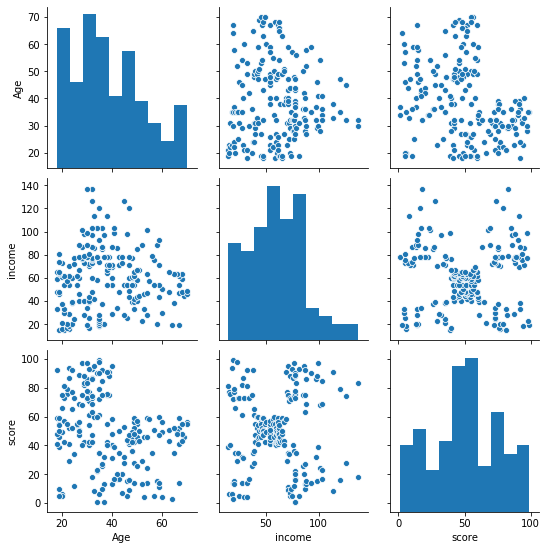

In [15]:
seaborn.pairplot(df[['Age','income','score']])

In [16]:
#Clustering by kmaens
import sklearn.cluster as cluster
kmeans = cluster.KMeans(n_clusters=5)

In [19]:
kmeans= kmeans.fit(df[['income','score']])

In [22]:
#See the centroid point
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [27]:
#Define a new column which will store the label value: which id has gone to which cluster
df['income_clusters']=kmeans.labels_

In [28]:
df

,CustomerID,gender,Age,income,score,clusters,income_clusters
0,1,Male,19,15,39,4,4
1,2,Male,21,15,81,3,3
2,3,Female,20,16,6,4,4
3,4,Female,23,16,77,3,3
4,5,Female,31,17,40,4,4
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,2
196,197,Female,45,126,28,1,1
197,198,Male,32,126,74,2,2
198,199,Male,32,137,18,1,1


In [29]:
df['income_clusters'].value_counts()

0    81
2    39
1    35
4    23
3    22
Name: income_clusters, dtype: int64

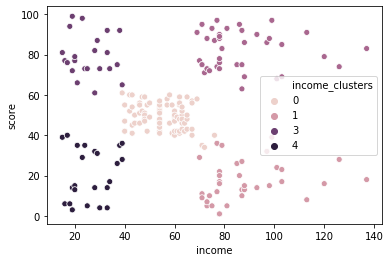

In [31]:
seaborn.scatterplot(x='income',y='score',hue='income_clusters',data=df)